In [1]:
# !python -m pip install -r ../requirements.txt
# !python -m pip install -e ../libs

# What is this notebook for ?

Once we have the annotation done in roboflow, we will do below tasks
1. Download the roboflow meta-data and dataset
2. Filter out unwanted data
3. check few samples on bounding boxes
4. Prepare the dataset for training/baseline

## Download roboflow meta-data
I have shared with annotators to tag the images as hard, blurry, assumed, adjusted, and done. I will include done & exclude hard and blurry ones.
- hard: its hard to do the annotation, ignoring it.
- blurry: the image is too blurry to annotate.
- assumed: assumption made in annotating. a very good guess though.
- adjusted: removed few pre-annotations which are not clear.
- done: i am done with adjusting the pre-annotations.

In [3]:
from binsense.dataprep.roboflow_util import RoboflowCrawler
from binsense.dataprep.config import DataPrepConfig
import logging

logging.basicConfig(level=logging.INFO, format='%(asctime)s %(levelname)s : %(message)s')

# copy the below data from the browser after sign in @ app.robolflow.com
#   access brower's network tab to get to the api call to see the details.
# the Roboflow REST api doesn't give consistent results, so relying on
#   api used on the browser by app.robolflow.com
cookie_string = 'ajs_anonymous_id=e4279315-ae21-40d5-861f-b51169f23e3a; __stripe_mid=a758133a-6f5f-407c-bb09-1b062d1a80699f6794; ajs_user_id=eEYy11ONL8bl5ZlkZHqx7JE1SF92; _cioid=eEYy11ONL8bl5ZlkZHqx7JE1SF92; __cuid=69e19e9bc24c4e23a72f10d840ff2c20; amp_fef1e8=eb7f5880-ecfb-4aa4-bdd2-115ce74ba350R...1hdsm3e31.1hdsm401m.15.o.1t; crisp-client%2Fsession%2F234b80f4-8fae-44e3-be30-be6f98ac8b9c=session_19ee147e-5b56-45da-bccb-c20684a34ddc; cookie_utms={%22host%22:%22blog.roboflow.com%22%2C%22path%22:%22/difference-semantic-segmentation-instance-segmentation/%22%2C%22referrer%22:%22https://www.google.com/%22}; _gcl_au=1.1.674121529.1710332965; _zitok=acdd5307d582a64a181a1711360412; amplitude_idundefinedroboflow.com=eyJvcHRPdXQiOmZhbHNlLCJzZXNzaW9uSWQiOm51bGwsImxhc3RFdmVudFRpbWUiOm51bGwsImV2ZW50SWQiOjAsImlkZW50aWZ5SWQiOjAsInNlcXVlbmNlTnVtYmVyIjowfQ==; _gid=GA1.2.1573171628.1711715274; crisp-client%2Fsession%2Fd5d3c29f-9108-4cd7-8296-580b989bc9bc=session_fff7980c-9c24-4a2f-819c-a92f5006cca7; __session=eyJhbGciOiJSUzI1NiIsImtpZCI6IkFrZEJodyJ9.eyJpc3MiOiJodHRwczovL3Nlc3Npb24uZmlyZWJhc2UuZ29vZ2xlLmNvbS9yb2JvZmxvdy1wbGF0Zm9ybSIsIm5hbWUiOiJuaXRlc2ggYyIsInBpY3R1cmUiOiJodHRwczovL2xoMy5nb29nbGV1c2VyY29udGVudC5jb20vYS9BQ2c4b2NKY3RSdUxzMnpMVUVRWGg0RDFTeHEwN0ZUQ1d4QU5GUTNZVC1Fb1Z3V1ZvSVFcdTAwM2RzOTYtYyIsIndvcmtzcGFjZXMiOnsiZUVZeTExT05MOGJsNVpsa1pIcXg3SkUxU0Y5MiI6Im93bmVyIn0sImF1ZCI6InJvYm9mbG93LXBsYXRmb3JtIiwiYXV0aF90aW1lIjoxNzExNzAyMDY2LCJ1c2VyX2lkIjoiZUVZeTExT05MOGJsNVpsa1pIcXg3SkUxU0Y5MiIsInN1YiI6ImVFWXkxMU9OTDhibDVabGtaSHF4N0pFMVNGOTIiLCJpYXQiOjE3MTE3MzE3MzQsImV4cCI6MTcxMjE2MzczNCwiZW1haWwiOiJyZWRkeS5uaXRlc2hAZ21haWwuY29tIiwiZW1haWxfdmVyaWZpZWQiOnRydWUsImZpcmViYXNlIjp7ImlkZW50aXRpZXMiOnsiZ29vZ2xlLmNvbSI6WyIxMDA2NDQ5NDEzNjExNzIzMTExNDkiXSwiZW1haWwiOlsicmVkZHkubml0ZXNoQGdtYWlsLmNvbSJdfSwic2lnbl9pbl9wcm92aWRlciI6Imdvb2dsZS5jb20ifX0.KBr2FV4NdgS-C4Ak79chWXprAAodJ_6NEdapmWdTf-_F9wkLIFVP0ikyL3uDAuSBnl6OFEvZS21a6pfpvqm4kbsx8K3RhZndT1rq_XC2mSK5jmxUWAwN4qqCGU2YWKh1UtjHmSQlPwWjkBgNc92lYlivTxa9A0g9OPaYnIwMYEbXJksBszAPMGepYun3kelGIRtniLcuFHabkC5q5AolV3ItwAmF49HcWazUonpGu12rNCYwzz3_x2nqwyHGr1jifEScjvtS1qSkwdyg8F63rrVd0ioaSRgzpm724KIg8AaAzN6VqhGcxVXivCetDgY_P051x82cTm7RgMnHf51vpA; __stripe_sid=49f80071-3b07-49f7-97f7-e4f99302e2ecc25e8e; _ga=GA1.1.52696650.1697715628; _ga_7RNES0270G=GS1.1.1711798859.36.1.1711798881.0.0.0; amplitude_id_11ee28f1673d40b5f704a83b880a5ddbroboflow.com=eyJkZXZpY2VJZCI6ImYyY2JhZWIyLTI4NjktNGNhMi1iYjc2LWEzNTZlZGFhZDI0NlIiLCJ1c2VySWQiOiJlRVl5MTFPTkw4Ymw1WmxrWkhxeDdKRTFTRjkyIiwib3B0T3V0IjpmYWxzZSwic2Vzc2lvbklkIjoxNzExNzk3NzI0MjM3LCJsYXN0RXZlbnRUaW1lIjoxNzExNzk5NjI2OTY2LCJldmVudElkIjoxMDMzLCJpZGVudGlmeUlkIjoxNTcyLCJzZXF1ZW5jZU51bWJlciI6MjYwNX0=; _ga_SEKT4K1EWR=GS1.1.1711797724.80.1.1711800041.0.0.0'
project_id = 'PedxdvWMh6obbp6GmpGm'
workspace_id = 'eEYy11ONL8bl5ZlkZHqx7JE1SF92'

cfg = DataPrepConfig()
crawler = RoboflowCrawler(
    project_id=project_id, 
    workspace_id=workspace_id,
    cookie_str=cookie_string,
    annotation_group='bins',
    target_path=cfg.rfmeta_file_path)
crawler_fpath = crawler.crawl()
print(f'downloaded the image meta-data @ {crawler_fpath}')

2024-03-30 23:57:36,159 INFO : number of columns = 14
2024-03-30 23:57:36,167 INFO : backing up /Users/n0c09jf/code/github/binsense/_data/bin/robo_metadata.csv to /Users/n0c09jf/code/github/binsense/_data/bin/robo_metadata.csv.1.bkp
2024-03-30 23:57:46,808 INFO : crawling roboflow.com:  13%|█▎        | 400/3080 [00:10<01:10, 38.14it/s]
2024-03-30 23:57:57,605 INFO : crawling roboflow.com:  26%|██▌       | 800/3080 [00:21<01:01, 37.34it/s]
2024-03-30 23:58:19,292 INFO : crawling roboflow.com:  52%|█████▏    | 1600/3080 [00:43<00:39, 37.09it/s]
2024-03-30 23:59:03,111 INFO : crawling roboflow.com: 100%|██████████| 3080/3080 [01:26<00:00, 33.70it/s]


downloaded the image meta-data @ /Users/n0c09jf/code/github/binsense/_data/bin/robo_metadata.csv


In [5]:
import pandas as pd

# crawler_fpath = '/Users/n0c09jf/code/github/binsense/_data/bin/roboflow_metadata.csv'
rf_meta_df = pd.read_csv(crawler_fpath, dtype={'image_name': str, 'bbox_label': str})
rf_meta_df.sort_values(by=['image_name', 'bbox_label'], inplace=True)
rf_meta_df.head()


,rf_image_id,image_name,tag,is_jithu,is_mythili,is_nitesh,is_raghu,is_adjusted,is_assumed,is_blurry,is_done,is_hard,bbox_label,bbox_count
0,P2SkkGQnD9cBTXInoafR,00016.jpg,train,0,0,0,0,0,0,0,0,1,B0033UNIQC,11
1,P2SkkGQnD9cBTXInoafR,00016.jpg,train,0,0,0,0,0,0,0,0,1,B00E9J3MLM,1
2,fmxcxMoja8jSpGAkxC2F,00017.jpg,train,0,0,0,0,0,0,0,0,0,B0033UNIQC,9
3,fmxcxMoja8jSpGAkxC2F,00017.jpg,train,0,0,0,0,0,0,0,0,0,B00E9J3MLM,1
5,sRyflEcP3d70egcTghlS,00037.jpg,train,0,0,0,0,1,0,0,0,0,B00F908YU4,1


In [8]:
user_tags = ['is_adjusted', 'is_assumed', 'is_blurry', 'is_done', 'is_hard']
def calc_prec(portion, total) -> float:
    return round(portion/total * 100, 1)

def calc_tag_perc(user_tag, df):
    cnt_y = df[df[user_tag] == 1].shape[0]
    return cnt_y, calc_prec(cnt_y, df.shape[0])

for user_tag in user_tags:
    print(user_tag, f'{calc_tag_perc(user_tag, rf_meta_df)}%')

df = rf_meta_df[rf_meta_df['is_done'] == 1]
df = df.query('is_hard != 1 & is_blurry != 1')
print(f'train data available: {df.shape[0]}({calc_prec(df.shape[0], rf_meta_df.shape[0])}%)')

is_adjusted (83, 1.4)%
is_assumed (139, 2.3)%
is_blurry (36, 0.6)%
is_done (629, 10.2)%
is_hard (131, 2.1)%
train data available: 533(8.7%)


## Download dataset generated from Roboflow
I have generated a version(1) on Roboflow https://app.roboflow.com/nitesh-c-eszzc/binsense_bbox_mini/1

In [3]:
from binsense.dataprep.roboflow_util import RoboflowDownloader
from binsense.dataprep.config import DataPrepConfig
import os

project = 'binsense_bbox_mini'
workspace = 'nitesh-c-eszzc'
dataset_version = 2
api_key = os.environ.get('ROBOFLOW_MY_API_KEY')

cfg = DataPrepConfig()
downloader = RoboflowDownloader(workspace, project, dataset_version, api_key=api_key)
downloader_fpath = downloader.download(target_dir=cfg.dataset_download_path, format='yolov8')
print(f'roboflow dataset downloaded @ {downloader_fpath}')

2024-03-30 23:29:22,769 INFO : backing up /Users/n0c09jf/code/github/binsense/_data/bin/robo_download to /Users/n0c09jf/code/github/binsense/_data/bin/robo_download.1.bkp


loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.
Exporting format yolov8 in progress : 85.0%
Version export complete for yolov8 format



Extracting Dataset Version Zip to /Users/n0c09jf/code/github/binsense/_data/bin/robo_download in yolov8:: 100%|██████████| 6169/6169 [00:12<00:00, 495.73it/s]


roboflow dataset downloaded @ /Users/n0c09jf/code/github/binsense/_data/bin/robo_download


## Validate the downloaded data with the original dataset
Does below checks
1. all image_names on roboflow match the dataset
2. all labels on roboflow match the dataset
3. for each image label and bounding box count should be less-than/equal-to that of the  dataset

In [1]:
from binsense.dataprep.roboflow_util import RoboflowDatasetValidator
from binsense.dataprep.config import DataPrepConfig
from binsense import downloader, metadata
import logging

logging.basicConfig(level=logging.INFO, format='%(asctime)s %(levelname)s : %(message)s')

cfg = DataPrepConfig()
downloader.download()
_, orig_df = metadata.load()
orig_df.sort_values(by=['bin_id', 'item_id'], inplace=True)
orig_df['image_name'] = orig_df['bin_id'] + '.jpg'
orig_df.rename(columns={
    'item_id': 'bbox_label',
    'item_qty': 'bbox_count'
}, inplace=True)
orig_df = orig_df[['image_name', 'bbox_label', 'bbox_count']].reset_index(drop=True)

2024-03-31 00:39:30,327 INFO : loading bin-metadata:  10%|▉         | 386/3875 [00:12<01:48, 32.24it/s]
2024-03-31 00:39:43,715 INFO : loading bin-metadata:  20%|█▉        | 774/3875 [00:26<01:42, 30.31it/s]
2024-03-31 00:40:10,369 INFO : loading bin-metadata:  40%|███▉      | 1547/3875 [00:52<01:26, 27.02it/s]
2024-03-31 00:41:13,145 INFO : loading bin-metadata:  80%|███████▉  | 3094/3875 [01:55<00:42, 18.17it/s]
2024-03-31 00:41:54,434 INFO : loading bin-metadata: 100%|██████████| 3875/3875 [02:36<00:00, 24.72it/s]


In [2]:
import pandas as pd

uploaded_df = pd.read_csv(cfg.data_split_filepath, dtype={'image_name': str, 'bbox_label': str})
uploaded_df = uploaded_df[["image_name", "tag", "bbox_label", "bbox_count"]]
uploaded_df["bbox_label"] = uploaded_df["bbox_label"].str.split('|').str[0]

df = orig_df.merge(uploaded_df[['image_name', 'bbox_label', 'tag']], on=["image_name", "bbox_label"], how="left")
df.fillna({'tag': 'test'}, inplace=True)
# TODO: populate df['uploaded'] = 1 or 0 
del uploaded_df

validator = RoboflowDatasetValidator(
    crawler_filepath=cfg.rfmeta_file_path, 
    dataset_dirpath=cfg.dataset_download_path)

valid, checks = validator.validate(df)
print(f'validation successful: {valid}')
print('\t\n'.join([ f'{chk[0]}: {chk[1]}' for chk in checks]))

2024-03-31 00:41:59,959 INFO : reading DataTag.TRAIN files:  10%|█         | 270/2697 [00:04<00:39, 60.75it/s]
2024-03-31 00:42:05,033 INFO : reading DataTag.TRAIN files:  20%|█▉        | 539/2697 [00:09<00:39, 54.09it/s]
2024-03-31 00:42:13,909 INFO : reading DataTag.TRAIN files:  40%|███▉      | 1077/2697 [00:18<00:25, 62.91it/s]
2024-03-31 00:42:29,705 INFO : reading DataTag.TRAIN files:  80%|███████▉  | 2153/2697 [00:34<00:07, 73.56it/s]
2024-03-31 00:42:37,562 INFO : reading DataTag.TRAIN files: 100%|██████████| 2697/2697 [00:42<00:00, 74.04it/s]
2024-03-31 00:42:38,238 INFO : reading DataTag.VALID files:  10%|█         | 39/383 [00:00<00:05, 59.09it/s]
2024-03-31 00:42:38,789 INFO : reading DataTag.VALID files:  20%|██        | 77/383 [00:01<00:04, 64.93it/s]
2024-03-31 00:42:40,011 INFO : reading DataTag.VALID files:  40%|███▉      | 153/383 [00:02<00:03, 70.08it/s]
2024-03-31 00:42:42,088 INFO : reading DataTag.VALID files:  80%|███████▉  | 305/383 [00:04<00:01, 74.47it/s]
2024

validation successful: True
rfmeta: not_empty: True	
rfmeta: image_count: True	
rfmeta: label_count: True	
rfmeta: bbox_count: True	
rfds: not_empty: True	
rfds: image_count: True	
rfds: label_count: True	
rfds: bbox_count: True


## Randomly sample to check the bounding boxes

In [5]:
import pandas as pd
from binsense.dataprep.config import DataPrepConfig
from binsense.dataprep.roboflow_util import RoboflowDatasetReader
from binsense.dataset_util import DataTag


cfg = DataPrepConfig()
df = pd.read_csv(cfg.rfmeta_file_path, dtype={'image_name': str, 'bbox_label': str})
df = df[df['is_done'] == 1]
df = df.query('is_hard != 1 & is_blurry != 1')
sample_image_names = df['image_name'].sample(6).to_list()
print(sample_image_names)

ds = RoboflowDatasetReader(cfg.dataset_download_path).read()
imgs_data = ds.get_images(DataTag.TRAIN)
imgs_data.extend(ds.get_images(DataTag.VALID))
sample_imgs_data = list(filter(lambda img_data: img_data.name in sample_image_names, imgs_data))

['02066.jpg', '02904.jpg', '03079.jpg', '03235.jpg', '01558.jpg', '02047.jpg']


2024-03-31 09:08:56,240 INFO : reading DataTag.TRAIN files:  10%|█         | 270/2697 [00:00<00:04, 513.14it/s]
2024-03-31 09:08:56,708 INFO : reading DataTag.TRAIN files:  20%|█▉        | 539/2697 [00:00<00:03, 603.79it/s]
2024-03-31 09:08:57,482 INFO : reading DataTag.TRAIN files:  40%|███▉      | 1077/2697 [00:01<00:02, 709.54it/s]
2024-03-31 09:08:58,998 INFO : reading DataTag.TRAIN files:  80%|███████▉  | 2153/2697 [00:03<00:00, 737.56it/s]
2024-03-31 09:08:59,790 INFO : reading DataTag.TRAIN files: 100%|██████████| 2697/2697 [00:04<00:00, 687.47it/s]
2024-03-31 09:08:59,858 INFO : reading DataTag.VALID files:  10%|█         | 39/383 [00:00<00:00, 632.04it/s]
2024-03-31 09:08:59,933 INFO : reading DataTag.VALID files:  20%|██        | 77/383 [00:00<00:00, 576.80it/s]
2024-03-31 09:09:00,033 INFO : reading DataTag.VALID files:  40%|███▉      | 153/383 [00:00<00:00, 636.25it/s]
2024-03-31 09:09:00,206 INFO : reading DataTag.VALID files:  80%|███████▉  | 305/383 [00:00<00:00, 776.38i

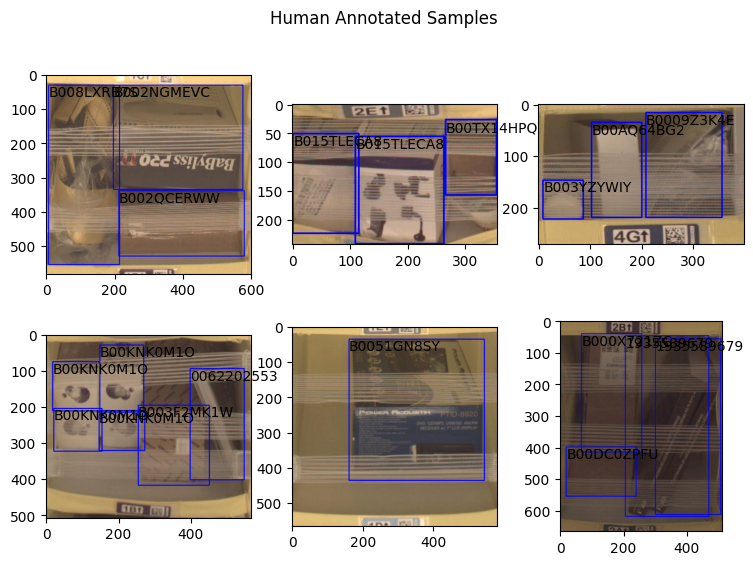

In [6]:
from binsense.dataset_util import BoundingBox, ImageData
from binsense.owlv2.utils import center_to_corners_format_numpy
from binsense.plot_utils import show_images_with_bboxes
from typing import List

import numpy as np

import PIL, logging

logging.basicConfig(level=logging.INFO, format='%(asctime)s %(levelname)s : %(message)s')

def format_bbox(bbox_data: BoundingBox, img_data: ImageData) -> np.array:
    bbox = np.array([
        bbox_data.center_x, bbox_data.center_y, 
        bbox_data.width, bbox_data.height
    ])
    scale_fct = np.array([img_data.width, img_data.height, img_data.width, img_data.height])
    bbox = bbox * scale_fct
    bbox = center_to_corners_format_numpy(bbox)
    bbox = bbox.astype(np.int32)
    return bbox

sample_imagearrs = []
sample_bboxes = []
sample_bbox_labels = []
for img_data in sample_imgs_data:
    img_pil = PIL.Image.open(img_data.path)
    img_data.width = img_pil.width
    img_data.height = img_pil.height
    img_data.normalized = False
    sample_imagearrs.append(np.array(img_pil))
    bboxes = ds.get_bboxes(img_data.name)
    sample_bbox_labels.append([bbox.label for bbox in bboxes])
    sample_bboxes.append([ format_bbox(bbox, img_data) for bbox in bboxes ])

show_images_with_bboxes(
    sample_imagearrs, sample_bboxes, 
    sample_bbox_labels, grid=(2, 3), 
    title='Human Annotated Samples')